In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

In [6]:
combined = pd.concat([X, test], axis=0, sort=False)

for col in combined.columns:
    if combined[col].dtype == "object":
        combined[col] = combined[col].fillna("None")
    else:
        combined[col] = combined[col].fillna(combined[col].median())

In [7]:
combined = pd.get_dummies(combined)

X = combined[:len(y)]
X_test = combined[len(y):]

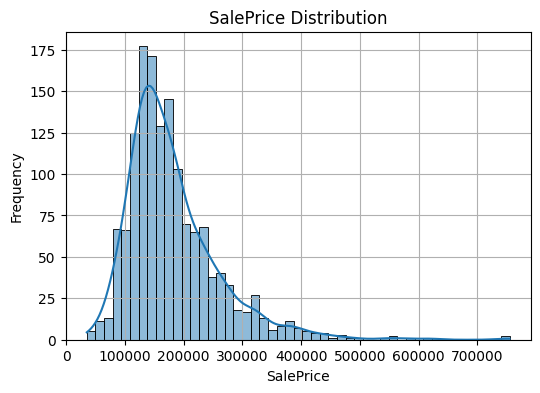

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

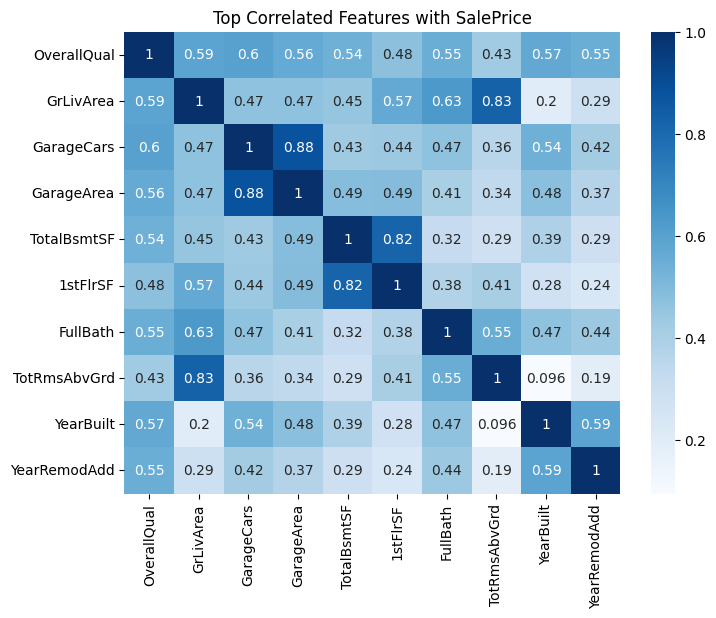

In [9]:
num_data = train.select_dtypes(include=[np.number])
correlation = num_data.corr()["SalePrice"].sort_values(ascending=False)
top_features = correlation.index[1:11]

plt.figure(figsize=(8, 6))
sns.heatmap(num_data[top_features].corr(), annot=True, cmap="Blues")
plt.title("Top Correlated Features with SalePrice")
plt.show()

In [10]:
def evaluate_model(model):
    scores = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    return -scores.mean()

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.001)
}

In [11]:
print("\nModel Performance (RMSE):\n")
for name, model in models.items():
    rmse = evaluate_model(model)
    print(f"{name:<20}: {rmse:.2f}")


Model Performance (RMSE):

Linear Regression   : 35433.01
Ridge Regression    : 31300.59


c:\Users\chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.431e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.078e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Lasso Regression    : 34467.38


c:\Users\chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(
